In [9]:
!pip install pandas matplotlib seaborn kagglehub


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import shutil

# Set a style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [13]:
# --- 1. Load the Actual Data from Local Path ---

csv_path = "/Users/rafinha/PycharmProjects/rdasilva1-vr2/data/wellbeing_surveys.csv"

try:
    df = pd.read_csv(csv_path)
    print("Dataset loaded successfully from local path.")
except FileNotFoundError:
    print(f"File not found at {csv_path}. Please verify the path.")

Dataset loaded successfully from local path.


In [14]:
# --- 2. Initial Data Inspection ---

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\n\nDataset Information:")
df.info()

print("\n\nDescriptive Statistics:")
print(df.describe())

print("\n\nChecking for missing values:")
print(df.isnull().sum())


First 5 rows of the dataset:
  Timestamp  FRUITS_VEGGIES DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
0    7/7/15               3            2               2            5   
1    7/7/15               2            3               4            3   
2    7/7/15               2            3               3            4   
3    7/7/15               3            3              10            3   
4    7/7/15               5            1               3            3   

   SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  ...  \
0                  0               5            2         0          1  ...   
1                  8              10            5         2          2  ...   
2                  4              10            3         2          2  ...   
3                 10               7            2         5          2  ...   
4                 10               4            2         4          2  ...   

   SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  SUFFICIEN

In [16]:
# --- 3. Data Cleaning & Preparation ---

# The column names are a bit inconsistent. Let's standardize them to lowercase.
df.columns = [col.lower() for col in df.columns]

print("\n\nCleaned column names:")
print(df.columns)



Cleaned column names:
Index(['timestamp', 'fruits_veggies', 'daily_stress', 'places_visited',
       'core_circle', 'supporting_others', 'social_network', 'achievement',
       'donation', 'bmi_range', 'todo_completed', 'flow', 'daily_steps',
       'live_vision', 'sleep_hours', 'lost_vacation', 'daily_shouting',
       'sufficient_income', 'personal_awards', 'time_for_passion',
       'weekly_meditation', 'age', 'gender', 'work_life_balance_score'],
      dtype='object')




--- Starting Univariate Analysis ---


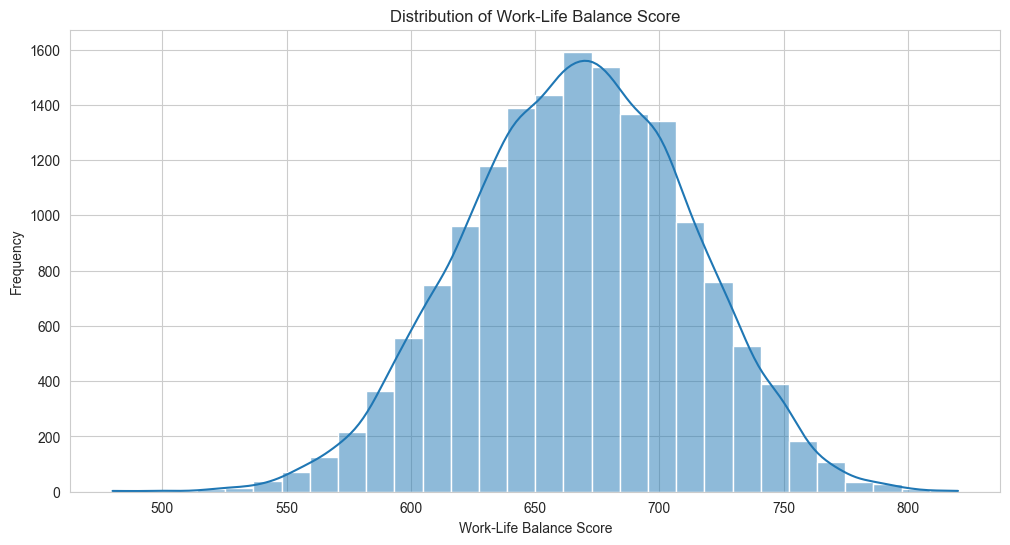

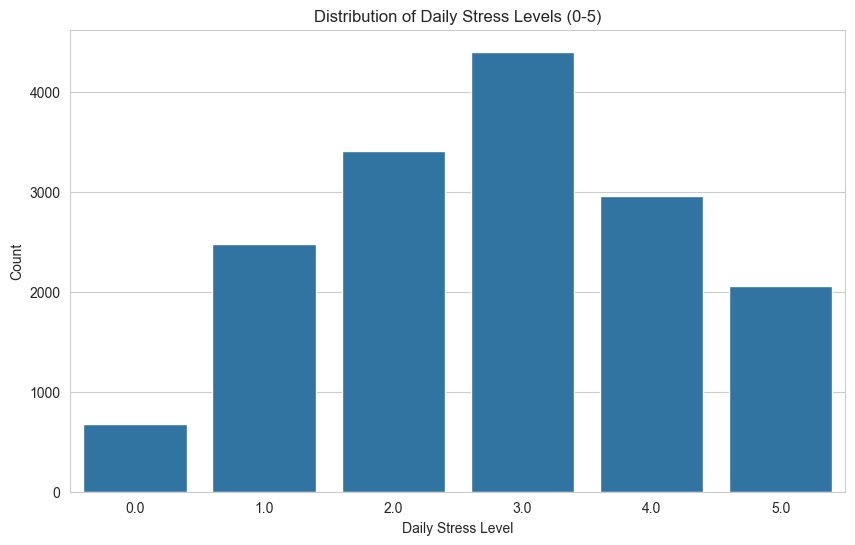

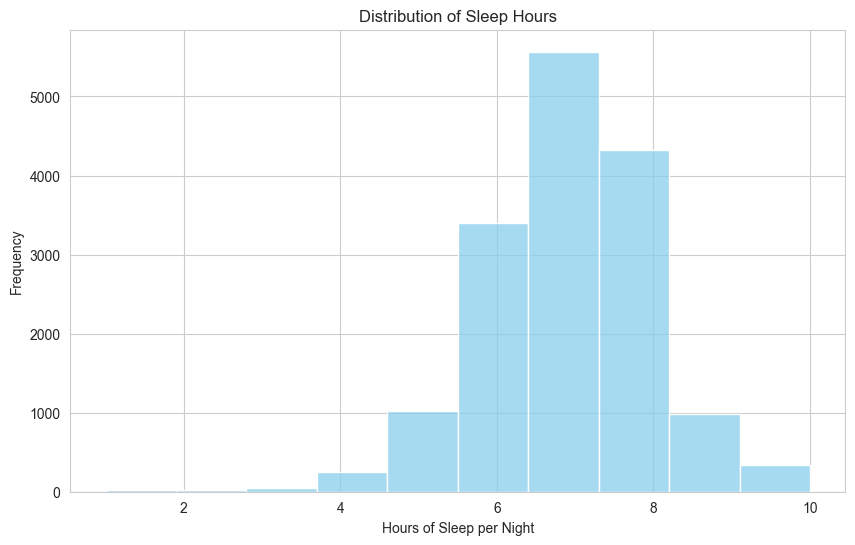

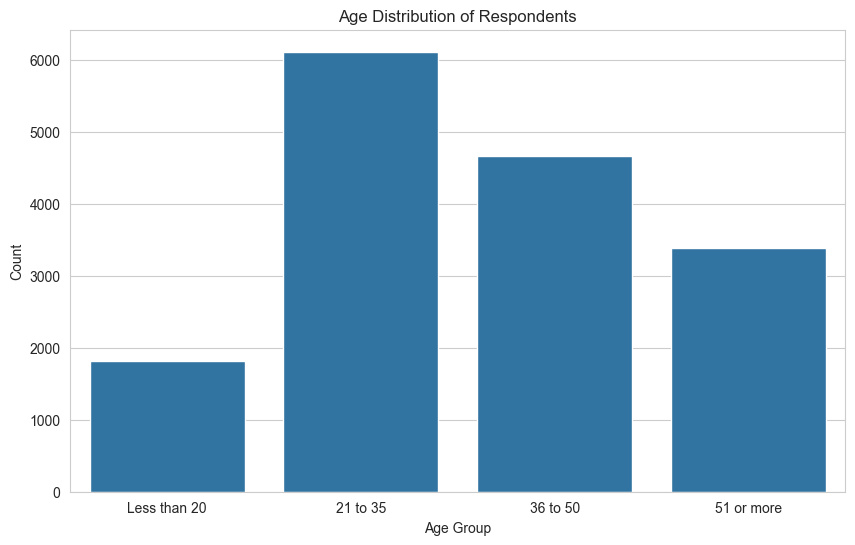

In [22]:
# --- 4. Univariate Analysis (Exploring Single Variables) ---

print("\n\n--- Starting Univariate Analysis ---")

# Distribution of the target variable: Work/Life Balance Score
plt.figure(figsize=(12, 6))
sns.histplot(df['work_life_balance_score'], kde=True, bins=30)
plt.title('Distribution of Work-Life Balance Score')
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Frequency')
plt.show()

# How stressed are people on a daily basis?
plt.figure(figsize=(10, 6))
sns.countplot(x='daily_stress', data=df)
plt.title('Distribution of Daily Stress Levels (0-5)')
plt.xlabel('Daily Stress Level')
plt.ylabel('Count')
plt.show()

# How many hours do people sleep?
plt.figure(figsize=(10, 6))
sns.histplot(df['sleep_hours'], kde=False, bins=10, color='skyblue')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Hours of Sleep per Night')
plt.ylabel('Frequency')
plt.show()

# What about the age distribution?
plt.figure(figsize=(10, 6))
sns.countplot(
    x='age',
    data=df,
    order=['Less than 20', '21 to 35', '36 to 50', '51 or more']
)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()





--- Starting Bivariate and Multivariate Analysis ---


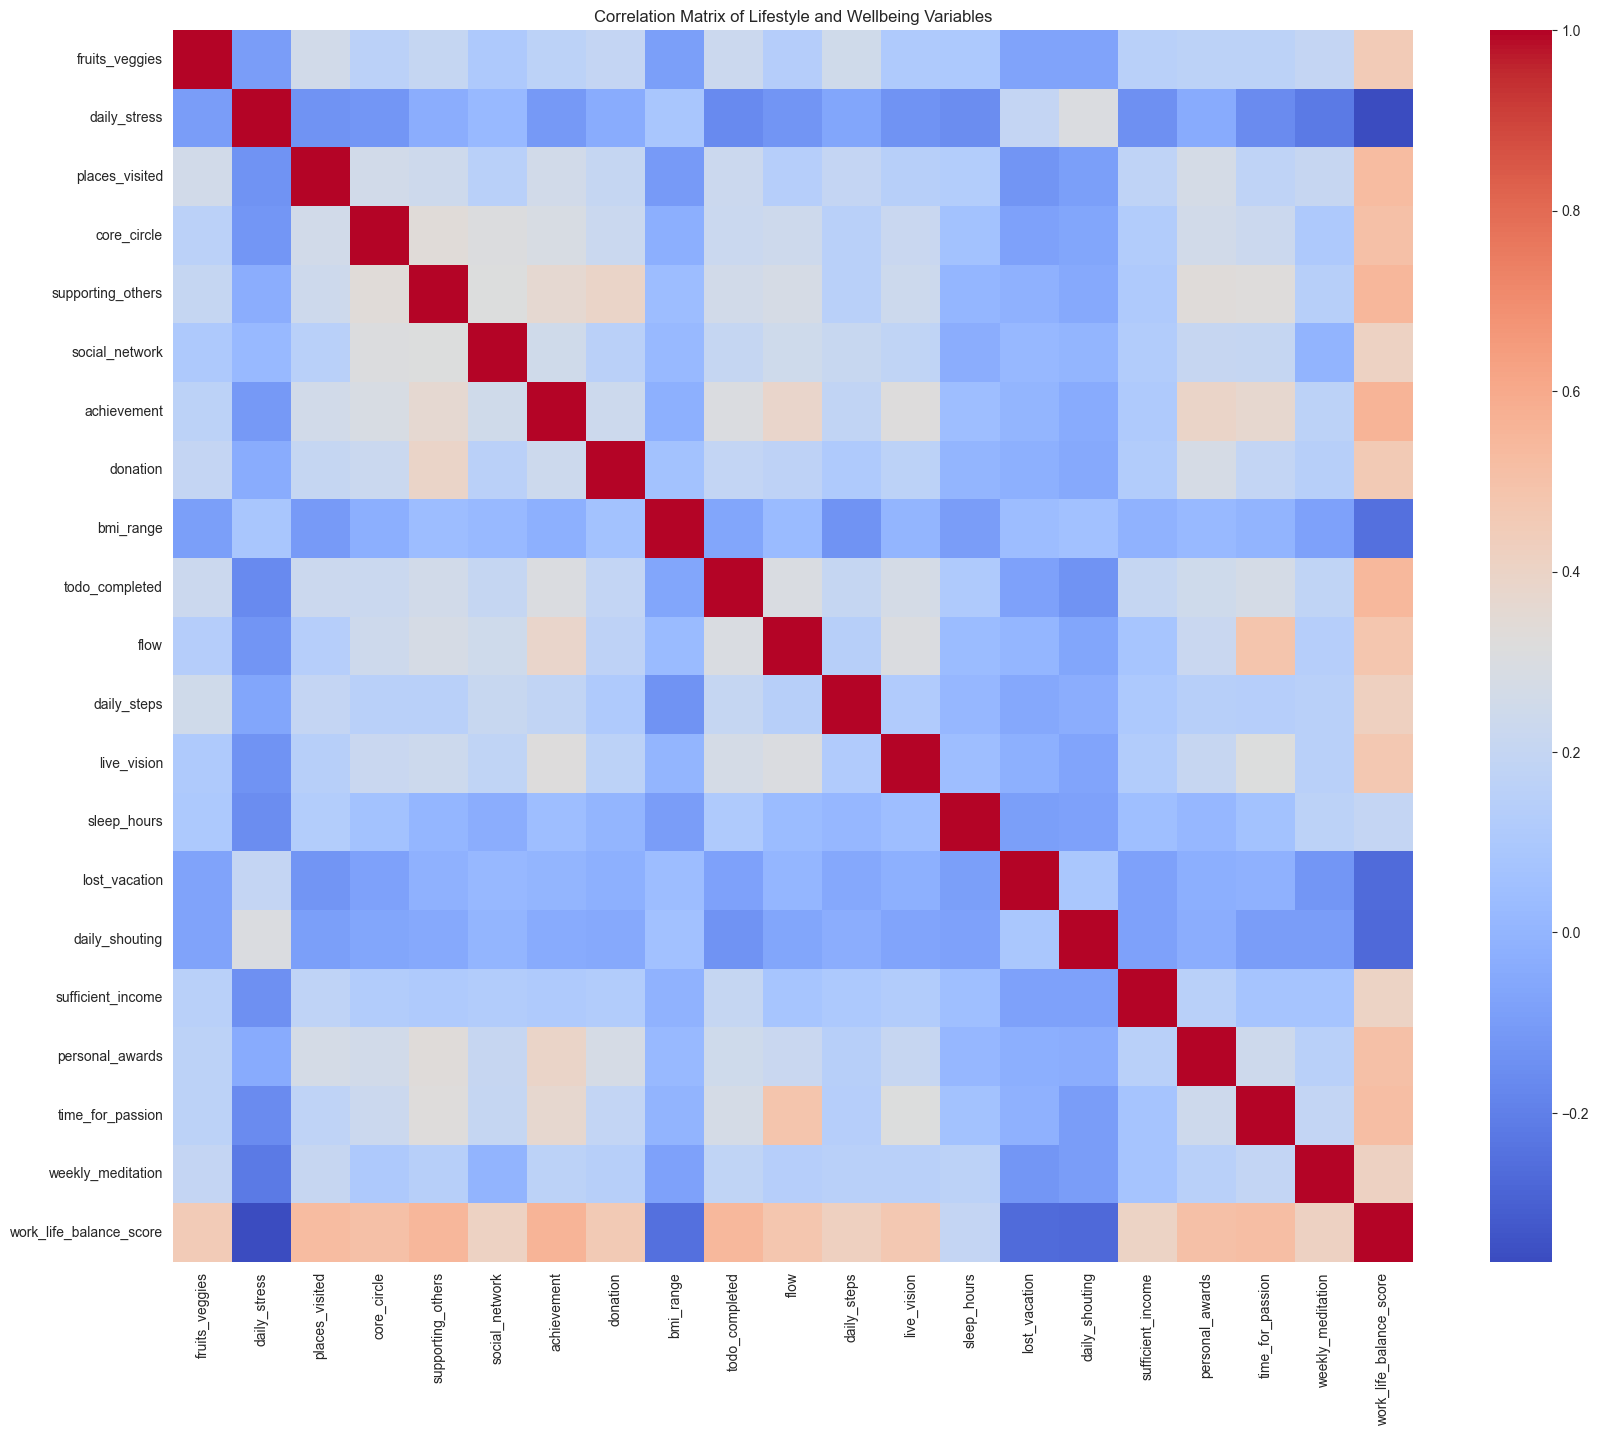

/var/folders/v2/j117lzps4zl77pmjj5kb54500000gn/T/ipykernel_86830/2467081863.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sleep_hours', y='daily_stress', data=df, palette='muted', orient='h')


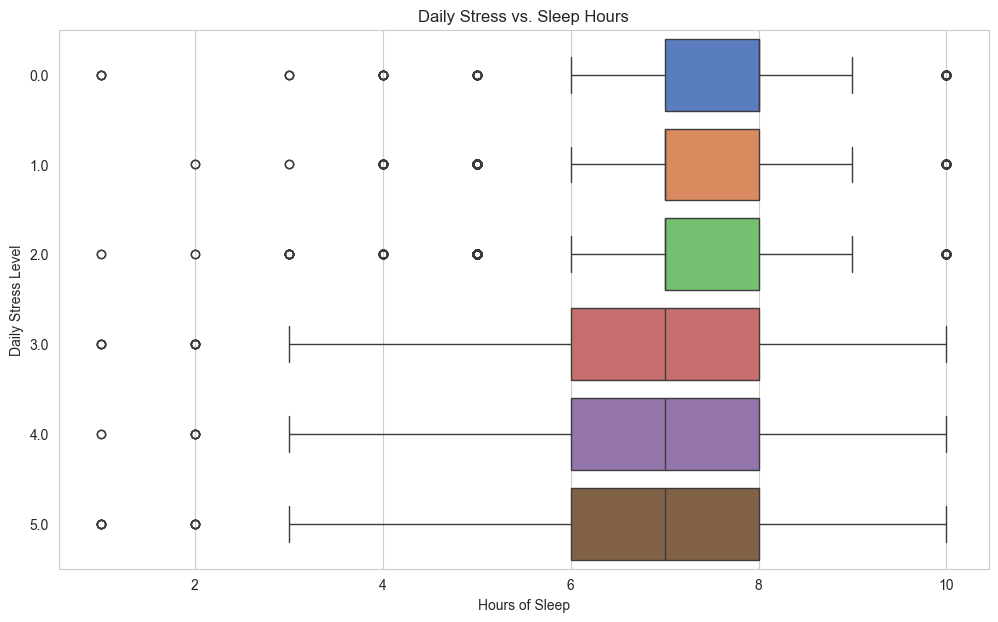

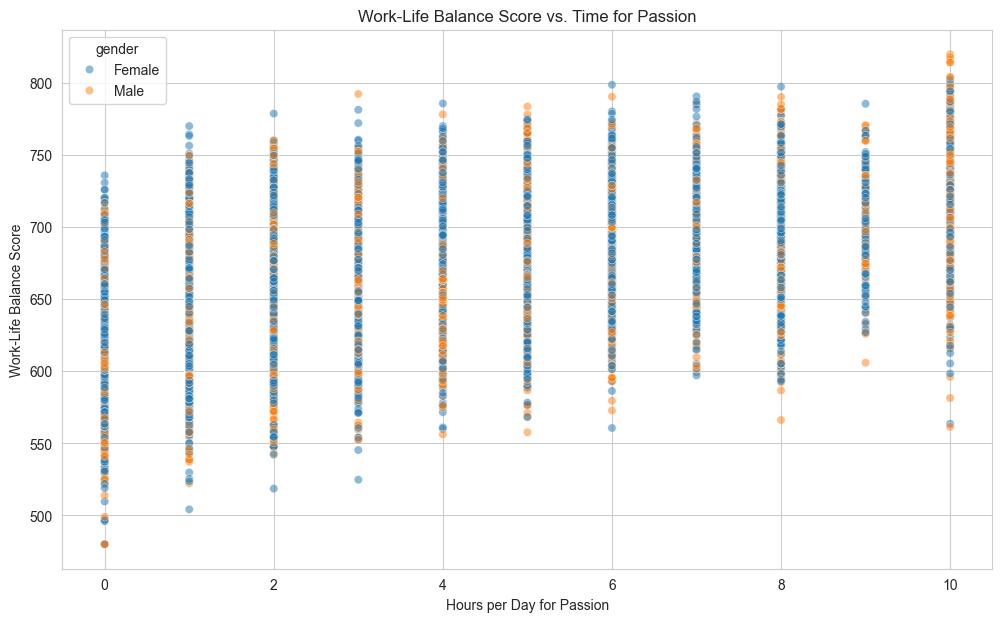

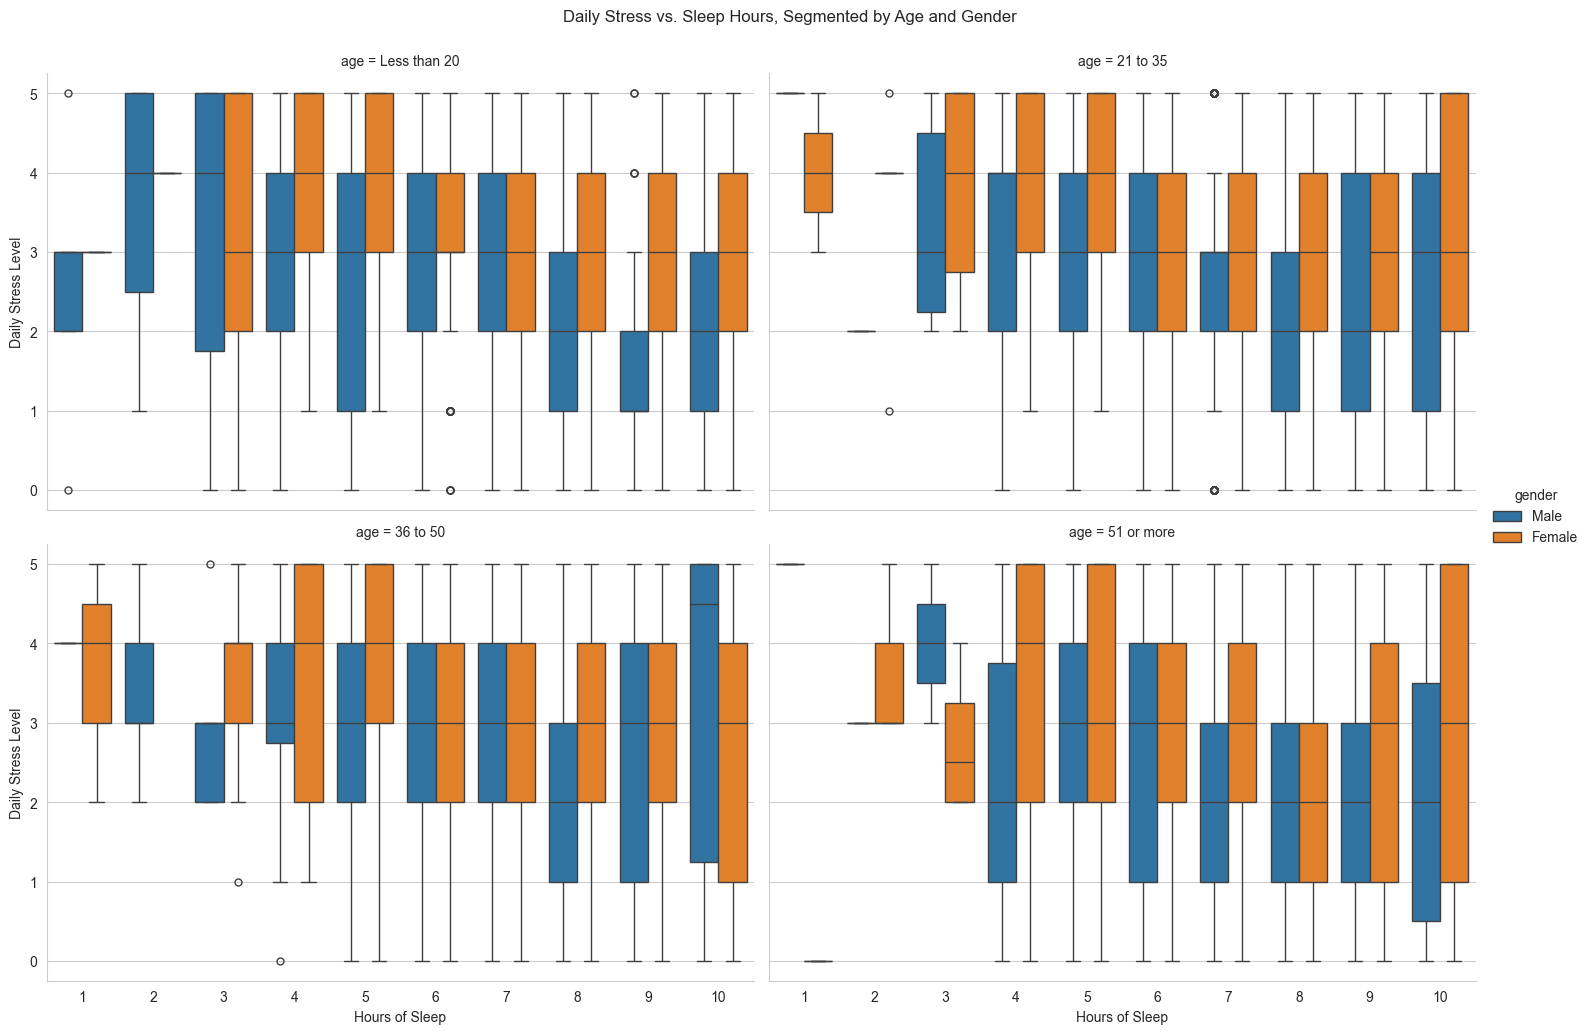

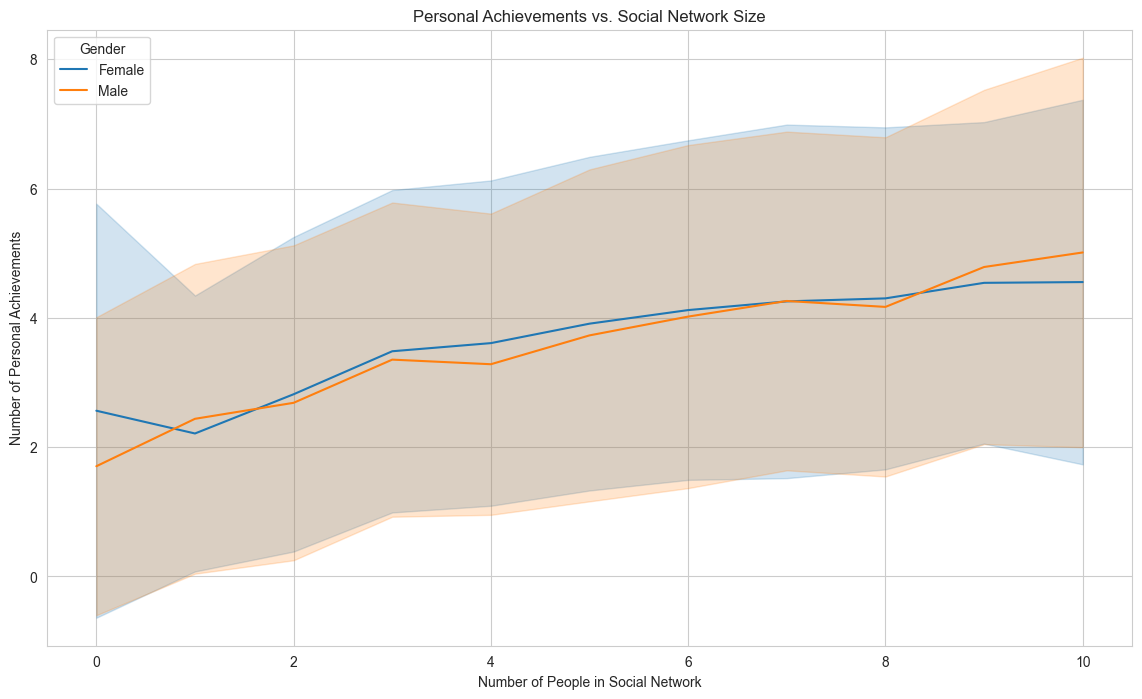



--- EDA Summary ---

1.  **Work-Life Balance Score**: The distribution appears somewhat normal but might be slightly skewed. This is our primary metric for 'wellbeing'.
2.  **Stress & Sleep**: There is a visible negative trend between sleep hours and stress levels. Generally, respondents who sleep more report lower levels of daily stress. This trend is consistent across different age groups and genders.
3.  **Passion & Balance**: Spending more time on personal passions shows a positive correlation with a higher work-life balance score.
4.  **Social Connections**: There's a positive trend indicating that individuals with a larger social network tend to report a higher number of personal achievements. The relationship appears stronger for females.
5.  **Age Groups**: The 21-35 age group is the largest segment in this dataset, making insights from this group particularly significant.
6.  **Correlations**: The heatmap revealed several interesting, though not overwhelmingly strong, correl

In [25]:
# --- 5. Bivariate & Multivariate Analysis (Exploring Relationships) ---

print("\n\n--- Starting Bivariate and Multivariate Analysis ---")

# Let's start with a correlation heatmap to see linear relationships.
plt.figure(figsize=(20, 16))
# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Lifestyle and Wellbeing Variables')
plt.show()

# How does stress relate to sleep?
plt.figure(figsize=(12, 7))
sns.boxplot(x='sleep_hours', y='daily_stress', data=df, palette='muted', orient='h')
plt.title('Daily Stress vs. Sleep Hours')
plt.xlabel('Hours of Sleep')
plt.ylabel('Daily Stress Level')
plt.show()

# How does time for passion relate to the overall work-life balance score?
plt.figure(figsize=(12, 7))
sns.scatterplot(x='time_for_passion', y='work_life_balance_score', data=df, alpha=0.5, hue='gender')
plt.title('Work-Life Balance Score vs. Time for Passion')
plt.xlabel('Hours per Day for Passion')
plt.ylabel('Work-Life Balance Score')
plt.show()


# Answering specific questions from your assignment document
# Question 1: How do sleep habits affect stress levels by age and gender?
g = sns.catplot(
    x='sleep_hours',
    y='daily_stress',
    hue='gender',
    col='age',
    data=df,
    kind='box',
    col_wrap=2,
    height=5,
    aspect=1.5,
    col_order=['Less than 20', '21 to 35', '36 to 50', '51 or more']
)
g.fig.suptitle('Daily Stress vs. Sleep Hours, Segmented by Age and Gender', y=1.03)
g.set_axis_labels("Hours of Sleep", "Daily Stress Level")
plt.show()


# Question 2: Do people with a larger social network report more personal achievements?
plt.figure(figsize=(14, 8))
sns.lineplot(x='social_network', y='achievement', data=df, errorbar='sd', hue='gender')
plt.title('Personal Achievements vs. Social Network Size')
plt.xlabel('Number of People in Social Network')
plt.ylabel('Number of Personal Achievements')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

print("\n\n--- EDA Summary ---")
print("""
1.  **Work-Life Balance Score**: The distribution appears somewhat normal but might be slightly skewed. This is our primary metric for 'wellbeing'.
2.  **Stress & Sleep**: There is a visible negative trend between sleep hours and stress levels. Generally, respondents who sleep more report lower levels of daily stress. This trend is consistent across different age groups and genders.
3.  **Passion & Balance**: Spending more time on personal passions shows a positive correlation with a higher work-life balance score.
4.  **Social Connections**: There's a positive trend indicating that individuals with a larger social network tend to report a higher number of personal achievements. The relationship appears stronger for females.
5.  **Age Groups**: The 21-35 age group is the largest segment in this dataset, making insights from this group particularly significant.
6.  **Correlations**: The heatmap revealed several interesting, though not overwhelmingly strong, correlations. For example, 'achievement' and 'supporting_others' have a positive correlation, as do 'flow' and 'todo_completed'. 'Daily_shouting' shows a negative correlation with most positive wellbeing metrics.
""")